In [1]:
import os
os.sys.path.append('../')
os.sys.path.append('../../../evaluation/')
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from create_training_data_lib import random_mixture_sample, plot_cov_ellipse, plot_1d_mixture, plot_2d_mixture, correlation_to_covariance


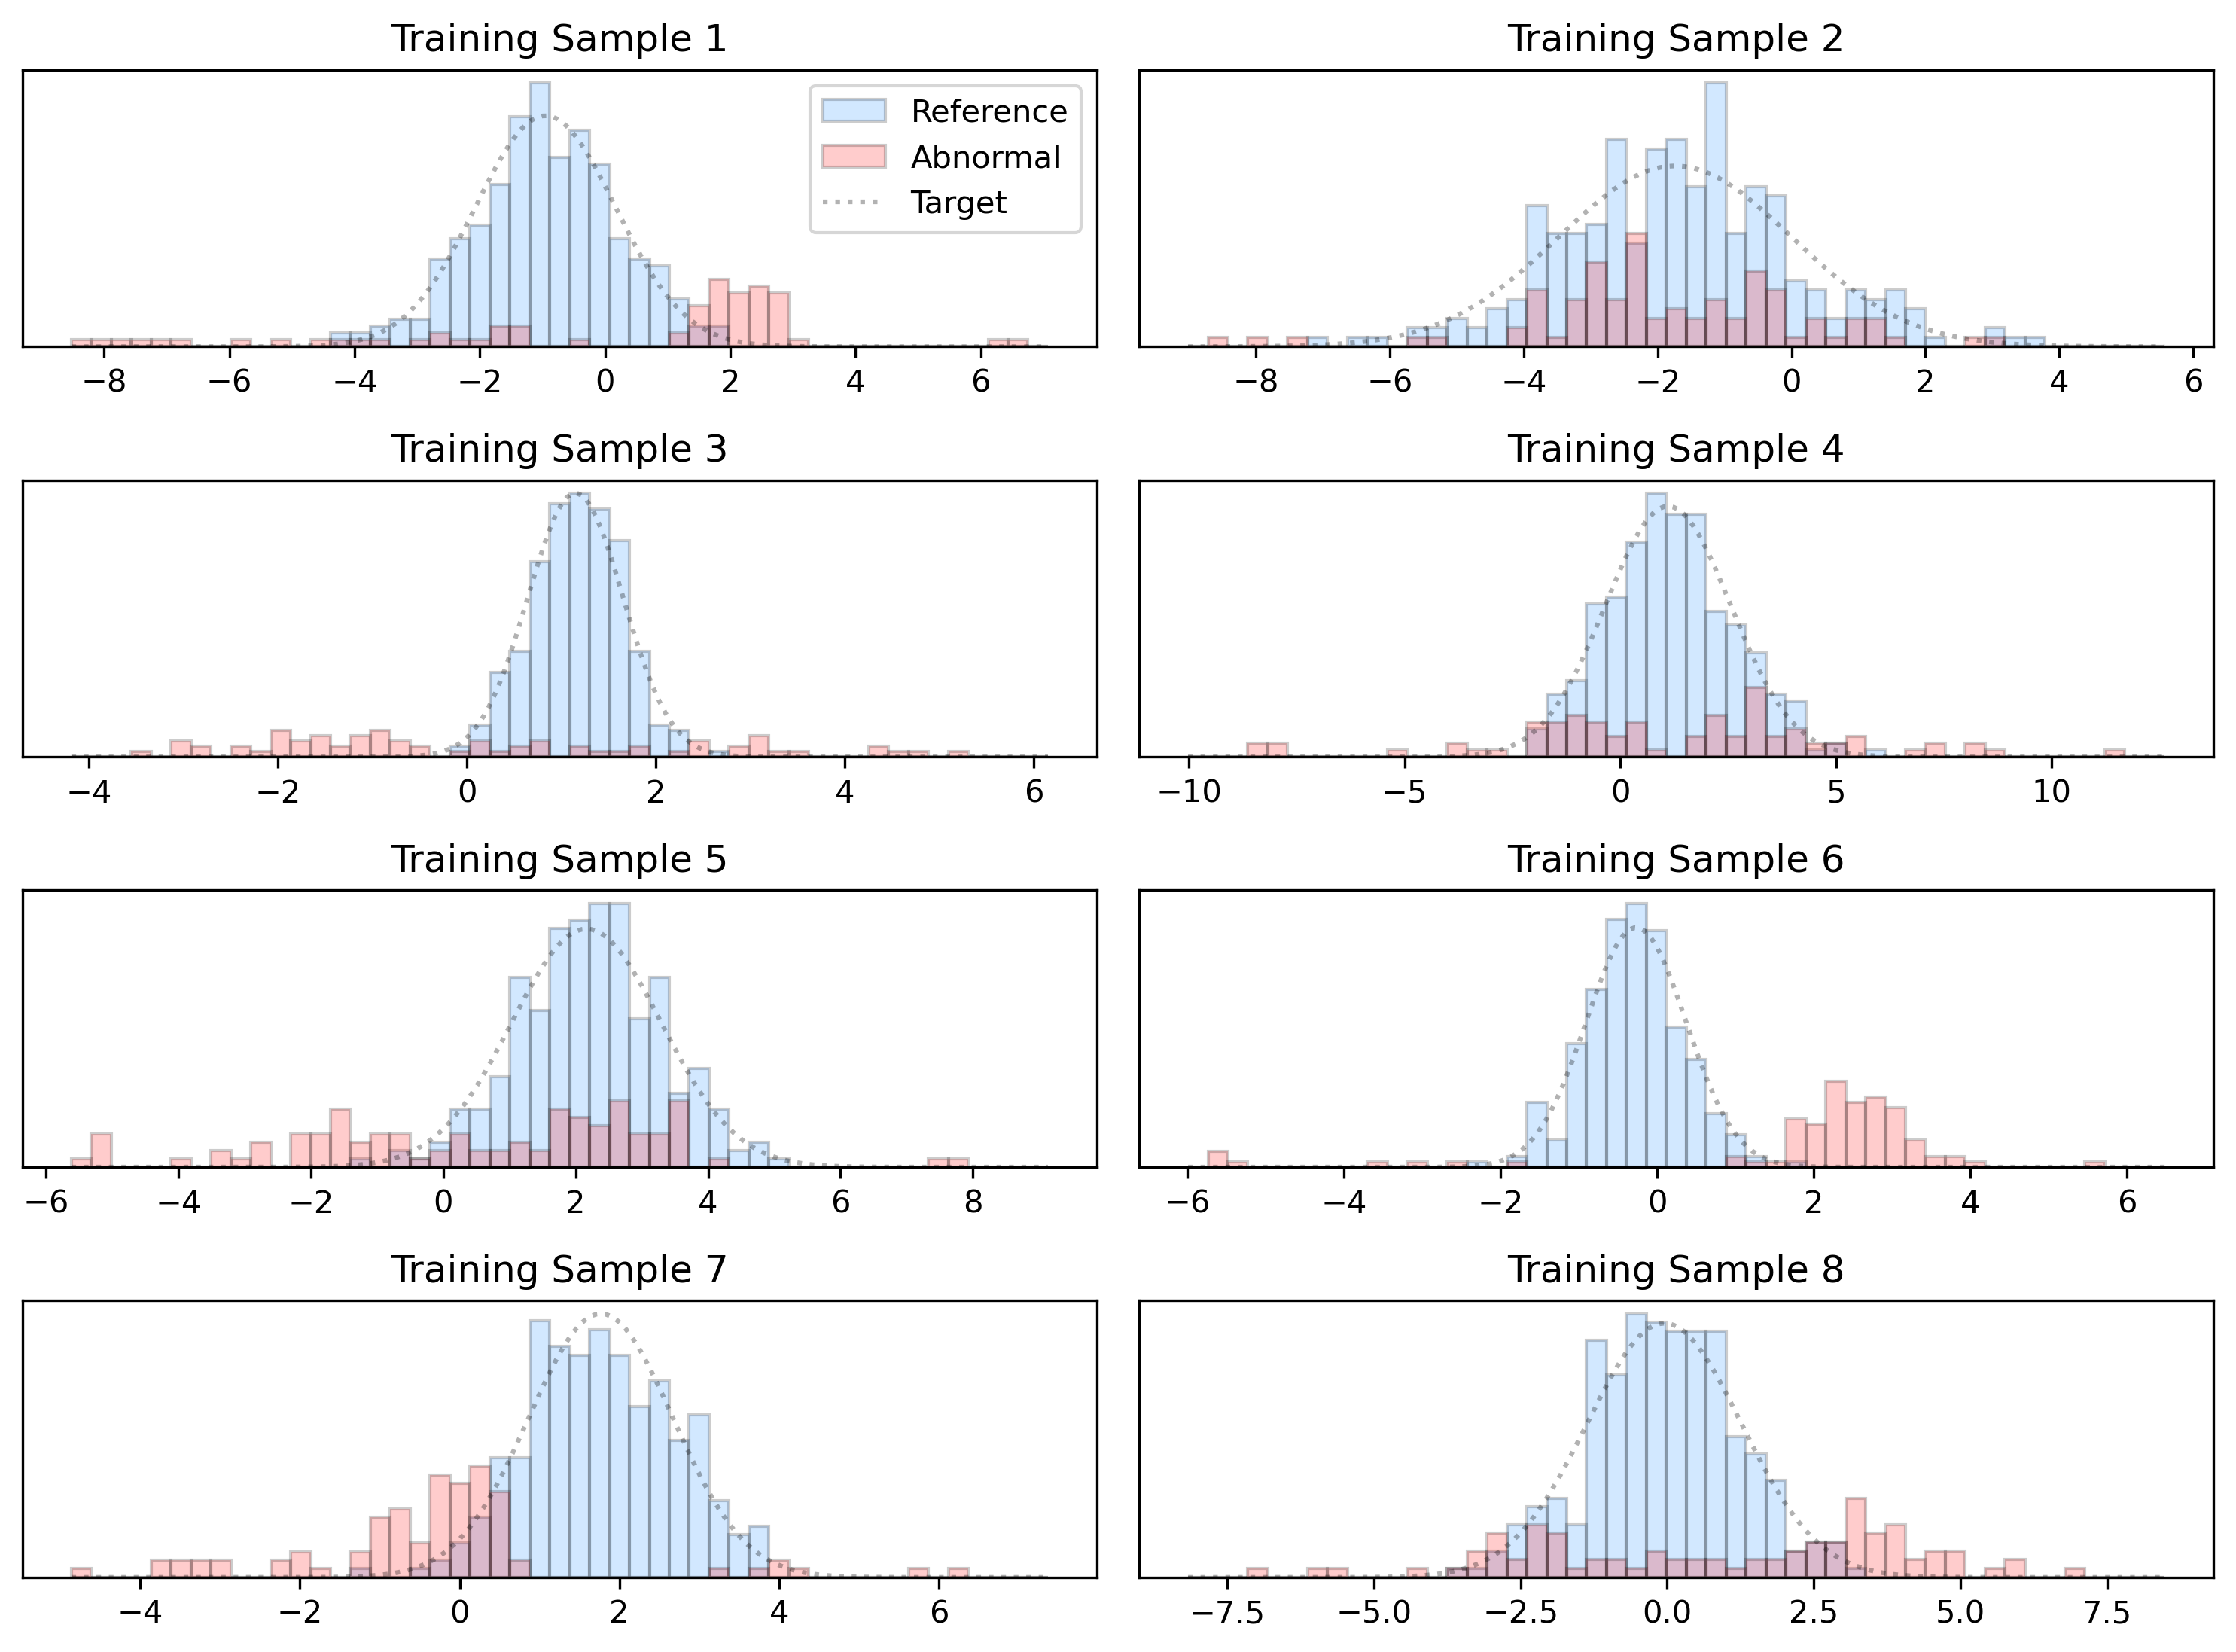

In [20]:
# plot 1D examples
    
n_dimensions = 1 # number of dimensions
n_components = [1, 2] # possible number of pathological components
sample_sizes = [374, 374]  # possible no. samples
mean_range = [-3, 3] # min/max possible mean of distributions
pathological_dev_percentage_range=[30, 60]
    
n = 8
plt.figure(figsize=(10, 2*n//2+1), dpi=300)
for i in range(8):
    
    if i==0:
        ncomp = 2
    else:
        ncomp = np.random.choice(n_components)
    sample, mean_vectors, std_devs, comps, sizes = random_mixture_sample(
        n_dimensions = n_dimensions, 
        n_components = ncomp,
        p_frac_range = [0.1, 0.3],
        n_samples = np.random.uniform(sample_sizes[0], sample_sizes[1]),
        mean_range = mean_range,
        pathological_dev_percentage_range = pathological_dev_percentage_range
    )
            
    plt.subplot(n//2+1,2,i+1)

    bins = np.linspace(sample.mean()-4*sample.std(), sample.mean()+4*sample.std(), 50)
    plt.hist(sample[comps==0], bins, density=False, edgecolor='k', color='dodgerblue', alpha=0.2, label='Reference')
    plt.hist(sample[comps!=0], bins, density=False, edgecolor='k', color='red', alpha=0.2, label='Abnormal')
    
    x_range_pdf = np.linspace(sample.mean()-4*sample.std(), sample.mean()+4*sample.std(), 200)
    pdf = norm(mean_vectors[0], std_devs[0]).pdf(x_range_pdf)
    bin_width = bins[1] - bins[0]
    pdf_scaled = pdf * len(sample[comps==0]) * bin_width
    plt.plot(x_range_pdf, pdf_scaled, c='k', linestyle=':', alpha=0.3, label='Target')
    plt.title('Training Sample '+str(i+1))
    
    if i==0:
        plt.legend()
    plt.yticks([])
        
plt.tight_layout()

